In [1]:
from functools import partial
import time
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("bodyfat.csv").drop("Density", axis=1)
data = data - data.mean()

In [9]:
def read_and_plot(res, res_key):
    df = pd.DataFrame(res[res_key])

    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 7), sharey=True)
    colnames = ["log-sigma"] + list(data.drop("Bodyfat", axis=1).columns) + ["Intercept"]

    for i, ax in enumerate(axes.reshape(-1)):
        col = df.columns[i]
        ax.hist(df[col])
        ax.set_title(colnames[i])

    plt.tight_layout()
    plt.show()
    #print(f"Median kappa: {res[1].median()}")

In [10]:
with open("results/tunAutoDiagonalNormal_202011_500_4000.pkl", "rb") as f:
    res = pickle.load(f)

the dictionary `res` contains all the results for the MF case

In [11]:
res.keys()

dict_keys(['probs_unscaled', 'probs_snis_mean_only', 'probs_snis_mean_and_std', 'probs_psis_mean_only', 'probs_psis_mean_and_std', 'kappas'])

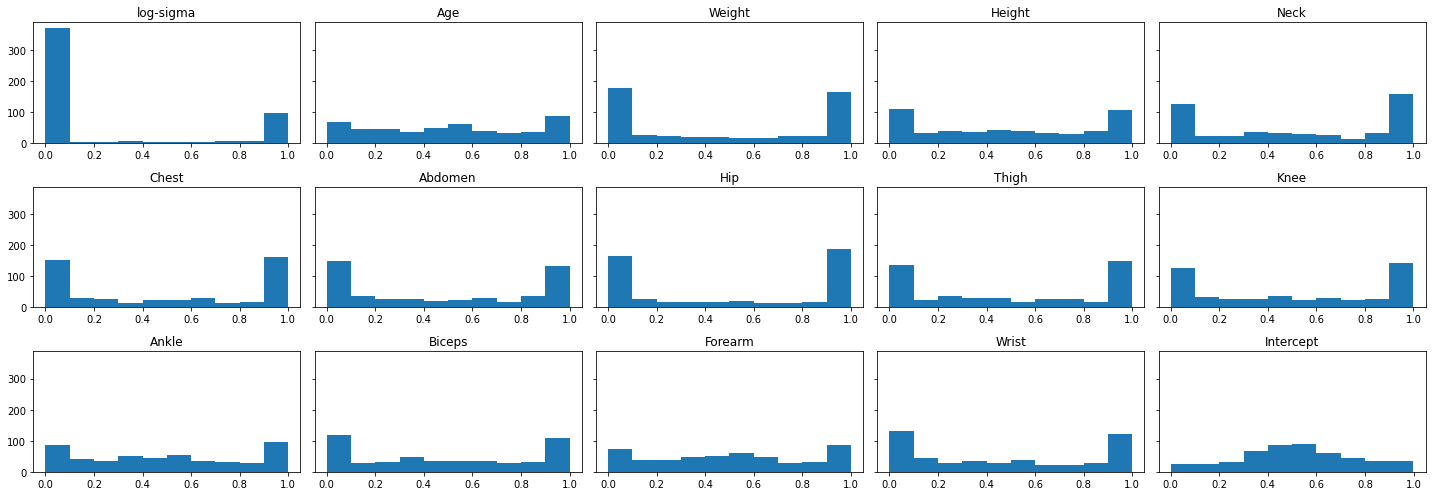

In [12]:
read_and_plot(res, "probs_unscaled")

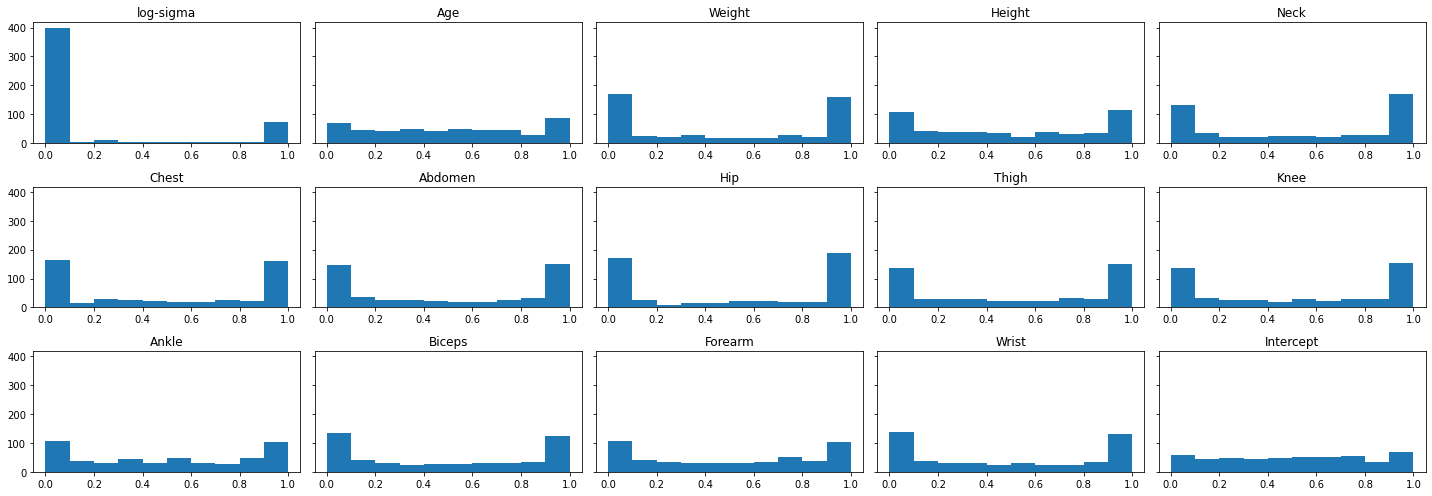

In [13]:
read_and_plot(res, "probs_snis_mean_only")

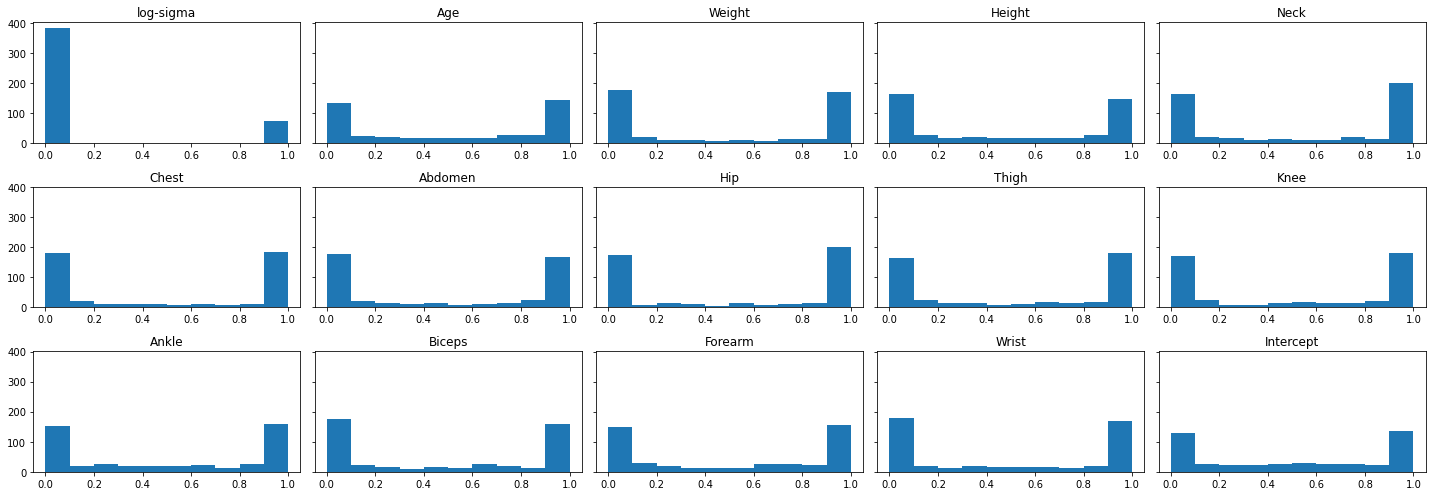

In [14]:
read_and_plot(res, "probs_snis_mean_and_std")

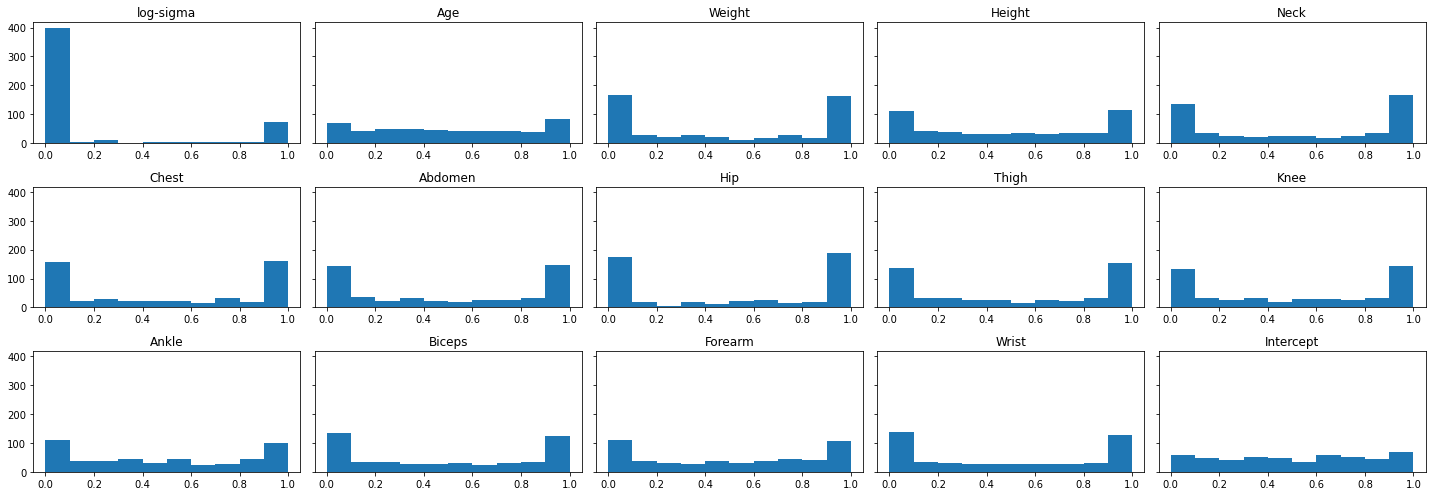

In [15]:
read_and_plot(res, "probs_psis_mean_only")

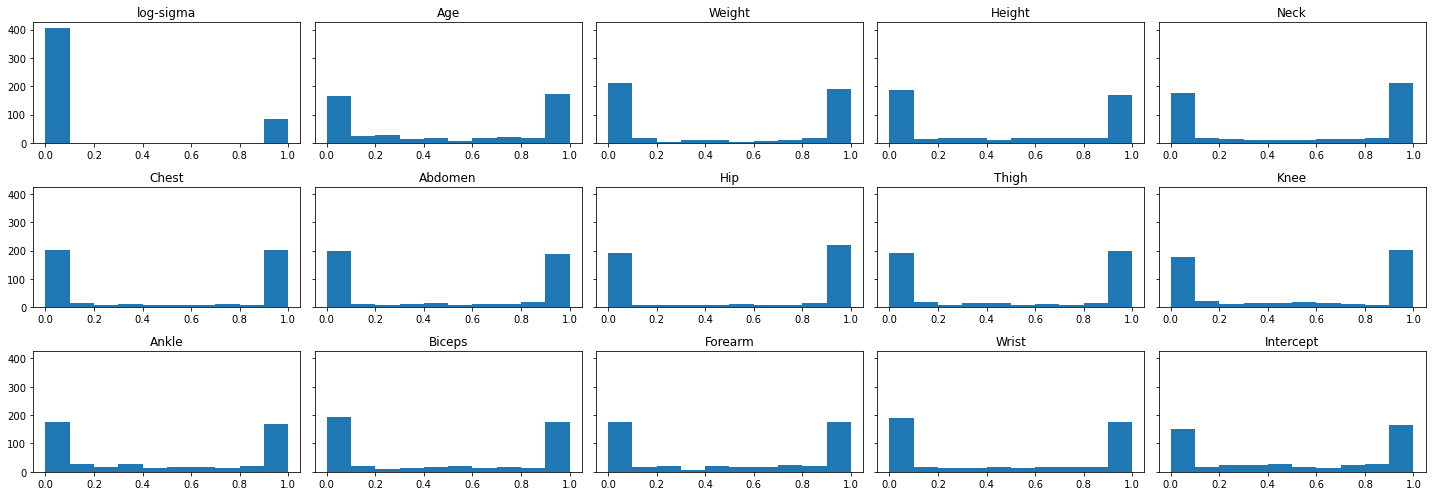

In [16]:
read_and_plot(res, "probs_psis_mean_and_std")